## Load needed modules and define path to data

In [34]:
on_aws = False
import time # only needed to time differnet algorithms

In [35]:
#for editing wav files to text
from pydub import AudioSegment 
from pydub.playback import play
from pydub.utils import mediainfo

In [36]:
# for speech to text
# deepspeech was installed in command line from 
# https://github.com/mozilla/DeepSpeech
# python 3.10 doesn't work, probably need 3.8

In [37]:
#for pyannote-audio's diarisation
import torch
from huggingface_hub import HfApi
available_pipelines = [p.modelId for p in HfApi().list_models(filter="pyannote-audio-pipeline")]
available_pipelines

['pyannote/speaker-diarization',
 'pyannote/overlapped-speech-detection',
 'pyannote/voice-activity-detection',
 'pyannote/speaker-segmentation']

In [38]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization")

In [39]:
# list files in tarxya bucket
if on_aws:
    !aws s3 ls voicetarxya/purchased/

In [40]:
# specify the audio file and the desired window
if on_aws:
    print("ON AWS!")
    !aws s3 cp s3://voicetarxya/purchased/in-443303309465-07449988008-20190624-110909-1561370949.138008.wav test_audio_from_s3.wav
    #!aws s3 cp s3://voicetarxya/purchased/q-801-1562945353.213997.wav test_audio_from_s3.wav
    !ls *wav
    base = "test_audio_from_s3" 
    audio = base + ".wav" 
    GLOBAL_START = 0. 
    GLOBAL_END = 60. 
if not on_aws:
    print("NOT ON AWS!")
    !ls *wav
    base = "audio" 
    audio = base + ".wav"
    GLOBAL_START = 480.
    GLOBAL_END = 540.

NOT ON AWS!
audio.wav  bin.wav  segmentino.wav  segment.wav


## use pydub to edit the audio file 

In [41]:
wav_file = AudioSegment.from_file(file = "audio.wav", format = "wav")
info = mediainfo("audio.wav")
ratio = float(len(wav_file))/float(info["duration_ts"])
sample_rate = wav_file.frame_rate*ratio
start_index = int(GLOBAL_START*sample_rate)
end_index = int(GLOBAL_END*sample_rate)

In [42]:
modified_wav_file = wav_file[start_index:end_index]
modified_wav_file.export(out_f = "segment.wav" , format = "wav")

<_io.BufferedRandom name='segment.wav'>

In [43]:
# Audio file
modified_wav_file

In [44]:
# Play the audio file
# play(modified_wav_file) this works too but is not as good as the above option

In [45]:
# robust way that writes to text file and re-reads later
#the shh variable makes it run without verbosity
#start_time = time.time()
#!rm $temp_file_name
#shhh=!deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio segment.wav >> $temp_file_name
#with open(temp_file_name) as file:
#    print(file.read())
#end_time = time.time()
#print("Time taken : ",end_time-start_time)

## Speech to text on specified time segment

In [46]:
# captures the output of the command line into dummytext, want dummytext[-1] for useful bit
start_time = time.time()
dummytext=!deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio segment.wav
print(dummytext[-1])
end_time = time.time()
print("\nTime taken : ",end_time-start_time)

yet not a bit comes back out to me it's a limited company and it stays there the third one is and there are four four of us it's a mental health trust you and the money just goes in to pay the employee celery i don't take anything from it sanguinetti and then come on goes that wasn't our noon wine going to do a base at you said his unerring up at you can clarify that with him nothing is important see so persons it open but there's nothing going in and not trading or out not trading acheson one this cassinettes or statically so that holiday lessingham discreetness

Time taken :  21.06375741958618


# WARNING THE NEXT CELL IS SLOW TO RUN, DONT RUN UNLESS NEED!
## this performs the diarisation on the entire audio file, it takes a while to run

In [14]:
# diarization
start_time = time.time()
dia = pipeline("segment.wav")
end_time = time.time()
end_time = time.time()
print("\nTime taken : ",end_time-start_time)


Time taken :  40.29378581047058


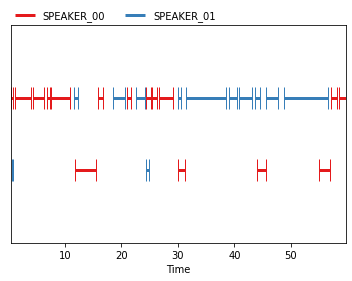

In [15]:
# plot whole dia
dia

In [16]:
# this can be used to crop the diarization if you dont do that before
# crop time interval and replot
#from pyannote.core import notebook, Segment
#notebook.crop = Segment(GLOBAL_START, GLOBAL_END)
#dia

## My attempt at stitching audio pieces together

##### idea here is that sometimes continuous speach by one speaker is broken into multiple chunks here, one long chunk is better for speech to text

In [22]:
# list each bin output from diariazation, some adjacent bins have the same speaker

speech_fragments = []
for turn, track, speaker in dia.itertracks(yield_label=True):
    if (True):#turn.end > GLOBAL_START and turn.start < GLOBAL_END):
        speech_fragments += [[speaker,turn.start,turn.end,"new"]]
        print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")
#for i in range(len(speech_fragments)): print(speech_fragments[i])

start=0.4s stop=0.8s speaker_SPEAKER_00
start=0.6s stop=0.8s speaker_SPEAKER_01
start=1.2s stop=3.9s speaker_SPEAKER_00
start=4.3s stop=6.2s speaker_SPEAKER_00
start=6.9s stop=7.3s speaker_SPEAKER_00
start=7.5s stop=10.9s speaker_SPEAKER_00
start=11.5s stop=12.4s speaker_SPEAKER_01
start=11.8s stop=15.5s speaker_SPEAKER_00
start=15.8s stop=16.7s speaker_SPEAKER_00
start=18.5s stop=20.6s speaker_SPEAKER_01
start=21.0s stop=21.7s speaker_SPEAKER_00
start=22.7s stop=24.1s speaker_SPEAKER_01
start=24.3s stop=25.1s speaker_SPEAKER_00
start=24.4s stop=24.9s speaker_SPEAKER_01
start=25.4s stop=26.4s speaker_SPEAKER_00
start=26.7s stop=29.2s speaker_SPEAKER_00
start=29.9s stop=30.5s speaker_SPEAKER_01
start=30.1s stop=31.2s speaker_SPEAKER_00
start=31.4s stop=38.6s speaker_SPEAKER_01
start=39.0s stop=40.5s speaker_SPEAKER_01
start=40.8s stop=43.2s speaker_SPEAKER_01
start=43.7s stop=44.5s speaker_SPEAKER_01
start=44.1s stop=45.5s speaker_SPEAKER_00
start=45.7s stop=47.8s speaker_SPEAKER_01
sta

In [23]:
# label if speaker is new or repeated and 
# make the "new" buckets have start and end times that absorb the later buckets with same speaker

# the reverse loop is important as we want to pull the latest finish time to the first start time

for i in reversed(range(len(speech_fragments)-1)): 
    frag = speech_fragments[i]
    nextfrag = speech_fragments[i+1]
    if frag[0]==nextfrag[0]:
        nextfrag[1] = frag[1]
        frag[2]=nextfrag[2]
        nextfrag[3] = "repeat"
    
for frag in speech_fragments: print(frag)
        

['SPEAKER_00', 0.37593750000000015, 0.8315625000000001, 'new']
['SPEAKER_01', 0.6121875000000001, 0.7978125000000001, 'new']
['SPEAKER_00', 1.1690625000000003, 10.9059375, 'new']
['SPEAKER_00', 1.1690625000000003, 10.9059375, 'repeat']
['SPEAKER_00', 4.307812500000001, 10.9059375, 'repeat']
['SPEAKER_00', 6.889687500000001, 10.9059375, 'repeat']
['SPEAKER_01', 11.5303125, 12.357187500000002, 'new']
['SPEAKER_00', 11.834062500000002, 16.7446875, 'new']
['SPEAKER_00', 11.834062500000002, 16.7446875, 'repeat']
['SPEAKER_01', 18.516562500000003, 20.625937500000003, 'new']
['SPEAKER_00', 20.9634375, 21.7059375, 'new']
['SPEAKER_01', 22.6509375, 24.102187500000003, 'new']
['SPEAKER_00', 24.3384375, 25.1484375, 'new']
['SPEAKER_01', 24.3890625, 24.895312500000003, 'new']
['SPEAKER_00', 25.3509375, 29.181562500000002, 'new']
['SPEAKER_00', 25.3509375, 29.181562500000002, 'repeat']
['SPEAKER_01', 29.9409375, 30.5146875, 'new']
['SPEAKER_00', 30.075937500000002, 31.1896875, 'new']
['SPEAKER_01',

In [24]:
# output the modified/grrouped buckets so that there are no more neighbouting buckets with same speaker

fixed_speech = []      
for frag in speech_fragments:
    if (frag[3]=="new"):
        fixed_speech += [frag]
        
for frag in fixed_speech: print(f"start={frag[1]:.1f}s stop={frag[2]:.1f}s speaker_{frag[0]}")
        

start=0.4s stop=0.8s speaker_SPEAKER_00
start=0.6s stop=0.8s speaker_SPEAKER_01
start=1.2s stop=10.9s speaker_SPEAKER_00
start=11.5s stop=12.4s speaker_SPEAKER_01
start=11.8s stop=16.7s speaker_SPEAKER_00
start=18.5s stop=20.6s speaker_SPEAKER_01
start=21.0s stop=21.7s speaker_SPEAKER_00
start=22.7s stop=24.1s speaker_SPEAKER_01
start=24.3s stop=25.1s speaker_SPEAKER_00
start=24.4s stop=24.9s speaker_SPEAKER_01
start=25.4s stop=29.2s speaker_SPEAKER_00
start=29.9s stop=30.5s speaker_SPEAKER_01
start=30.1s stop=31.2s speaker_SPEAKER_00
start=31.4s stop=44.5s speaker_SPEAKER_01
start=44.1s stop=45.5s speaker_SPEAKER_00
start=45.7s stop=56.6s speaker_SPEAKER_01
start=55.0s stop=59.7s speaker_SPEAKER_00


In [48]:
start_time = time.time()

for frag in fixed_speech:
    start_index = int((frag[1]-0.1)*sample_rate)
    end_index = int((frag[2]+0.1)*sample_rate)
    segmentino_wav_file = modified_wav_file[start_index:end_index]
    segmentino_wav_file.export(out_f = "segmentino.wav" , format = "wav")
    try:
        dummytext=!deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio segmentino.wav
        #print(f"*------------------------START---------t={frag[1]:.1f}s--------*")
        print(f"{frag[0]} : {dummytext[-1]}")
        print("")
        #print(f"*-------------------------END----------t={frag[2]:.1f}s--------*")
    except Exception as e:
        #print(f"*------------------------START---------t={frag[1]:.1f}s--------*")
        print(f"{frag[0]} : ??? ")
        print("")
        #print(f"*-------------------------END----------t={frag[2]:.1f}s--------*")
end_time = time.time()
print(f"Transcript time : {end_time-start_time}s")
    

SPEAKER_00 : yes

SPEAKER_01 : 

SPEAKER_00 : not if it comes back out to me as i limited company and it stays there the third one is an there are four four of us it's a mental health truth

SPEAKER_01 : yes the money

SPEAKER_00 : the money just goes in to pay the employee celery i don't take anything from it

SPEAKER_01 : oh i can get it

SPEAKER_00 : now could i

SPEAKER_01 : now i show 

SPEAKER_00 : as

SPEAKER_01 : as

SPEAKER_00 : i don't want to take it and then come on goes on that wasn't all

SPEAKER_01 : now

SPEAKER_00 : no woman 

SPEAKER_01 : no no no wine can adorabat you said his unregenerate clarify that with them nothing is important to so persons it open but there's nothing going in and

SPEAKER_00 : no it's not trading

SPEAKER_01 : oh our not trading a cat the second one is cachinatory so that holiday lessingstrasse no sentence

SPEAKER_00 : now sittin the business it's a limited company

Transcript time : 25.836119174957275s
